In [3]:
import pandas as pd   # Great for tables (google spreadsheets, microsoft excel, csv). 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import spacy
import wordcloud
import os # Good for navigating your computer's files 
import sys
pd.options.mode.chained_assignment = None #suppress warnings

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from spacy.lang.en.stop_words import STOP_WORDS
nltk.download('wordnet')
nltk.download('punkt')

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [6]:
! spacy download en_core_web_md
import en_core_web_md
text_to_nlp = en_core_web_md.load()



2023-04-03 05:39:29.232247: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 16.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [7]:
data_file  = 'yelp_final.csv'

!wget https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%201%20-%205/Session%203%20-%20NLP/yelp_final.csv


--2023-04-03 05:39:59--  https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%201%20-%205/Session%203%20-%20NLP/yelp_final.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 142.251.18.128, 142.250.153.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 760976 (743K) [text/csv]
Saving to: ‘yelp_final.csv’

yelp_final.csv      100%[===================>] 743.14K  1.90MB/s    in 0.4s    

2023-04-03 05:40:00 (1.90 MB/s) - ‘yelp_final.csv’ saved [760976/760976]



In [9]:
yelp_full = pd.read_csv(data_file)
yelp_full.head()

,business_id,stars,text,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,5,My wife took me here on my birthday for breakf...,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,5,I have no idea why some people give bad review...,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,_1QQZuf4zZOyFCvXc0o6Vg,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",uZetl9T0NcROGOyFfughhg,1,2,0
3,6ozycU1RpktNG2-1BroVtw,5,General Manager Scott Petello is a good egg!!!...,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
4,zp713qNhx8d9KCJJnrw1xA,5,Drop what you're doing and drive here. After I...,wFweIWhv2fREZV_dYkz_1g,7,7,4


In [11]:
needed_columns = ['stars','text']
yelp = yelp_full[needed_columns]
yelp.head()

,stars,text
0,5,My wife took me here on my birthday for breakf...
1,5,I have no idea why some people give bad review...
2,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
3,5,General Manager Scott Petello is a good egg!!!...
4,5,Drop what you're doing and drive here. After I...


In [13]:
#@title Check out the text in differently rated reviews
num_stars =  5#@param {type:"integer"}

for t in yelp[yelp['stars'] == num_stars]['text'].head(20).values:
    print (t) 

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!
I have no idea why some people give bad reviews about this place. It goes to show you, you can please everyone

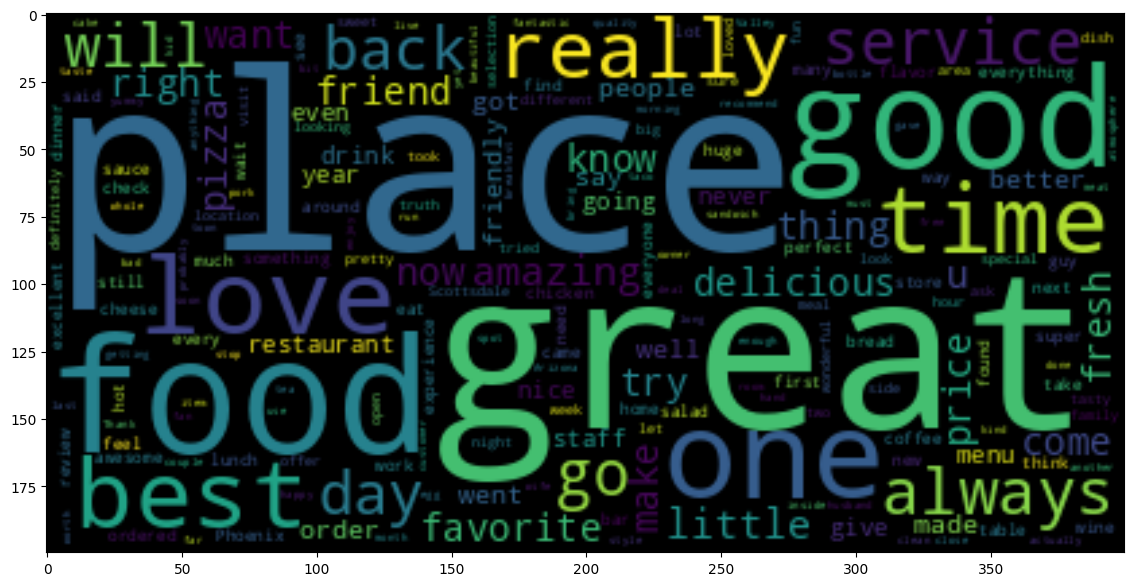

In [15]:
#@title Word cloud for differently rated reviews
num_stars =  5#@param {type:"integer"}
this_star_text = ''
for t in yelp[yelp['stars'] == num_stars]['text'].values: # form field cell
    this_star_text += t + ' '
    
wordcloud = WordCloud()    
wordcloud.generate_from_text(this_star_text)
plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation='bilinear')

In [ ]:
#@title Rules
rule_1 = "" #@param {type:"string"}
rule_2 = "" #@param {type:"string"}
rule_3 = "" #@param {type:"string"}

In [16]:
def is_good_review(num_stars):
    if num_stars > 3: 
        return True
    else:
        return False

yelp['is_good_review'] = yelp['stars'].apply(is_good_review)
yelp.head()

,stars,text,is_good_review
0,5,My wife took me here on my birthday for breakf...,True
1,5,I have no idea why some people give bad review...,True
2,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",True
3,5,General Manager Scott Petello is a good egg!!!...,True
4,5,Drop what you're doing and drive here. After I...,True


In [17]:
#@title Basic tokenization example
example_text = "All the people I spoke to were super nice and very welcoming." #@param {type:"string"}
tokens = word_tokenize(example_text)
tokens

['All',
 'the',
 'people',
 'I',
 'spoke',
 'to',
 'were',
 'super',
 'nice',
 'and',
 'very',
 'welcoming',
 '.']

In [18]:
#@title Check if a word is a stop word
example_word = "not" #@param {type:'string'}
if example_word.lower() in STOP_WORDS:
  print ('"' + example_word + '" is a stop word.')
else:
  print ('"' + example_word + '" is NOT a stop word.')

"not" is a stop word.


In [19]:
X_text = yelp['text']
y = yelp['is_good_review']

In [20]:
#@title Initialize the text cleaning function { display-mode: "form" }
def tokenize(text):
    clean_tokens = []
    for token in text_to_nlp(text):
        if (not token.is_stop) & (token.lemma_ != '-PRON-') & (not token.is_punct): # -PRON- is a special all inclusive "lemma" spaCy uses for any pronoun, we want to exclude these 
            clean_tokens.append(token.lemma_)
    return clean_tokens

In [21]:
bow_transformer = CountVectorizer(analyzer=tokenize, max_features=800).fit(X_text)

In [22]:
bow_transformer.vocabulary_

{'wife': 781,
 'take': 702,
 'birthday': 101,
 'breakfast': 117,
 'excellent': 263,
 ' ': 2,
 'perfect': 524,
 'sit': 643,
 'outside': 506,
 'waitress': 763,
 'food': 302,
 'arrive': 67,
 'quickly': 568,
 'busy': 128,
 'Saturday': 43,
 'morning': 467,
 'look': 422,
 'like': 410,
 'place': 535,
 'fill': 290,
 'pretty': 554,
 'early': 245,
 'well': 778,
 '\n\n': 1,
 'simply': 641,
 'good': 328,
 'sure': 696,
 'use': 746,
 'ingredient': 382,
 'fresh': 308,
 'order': 503,
 'amazing': 62,
 'menu': 454,
 'white': 779,
 'egg': 249,
 'vegetable': 752,
 'tasty': 705,
 'delicious': 222,
 'come': 173,
 '2': 14,
 'piece': 533,
 'bread': 115,
 'absolutely': 54,
 'meal': 447,
 'toast': 720,
 'wait': 761,
 'idea': 376,
 'people': 522,
 'bad': 82,
 'review': 593,
 'go': 327,
 'probably': 558,
 'case': 139,
 'friend': 311,
 'pm': 543,
 'past': 517,
 'Sunday': 46,
 'think': 714,
 'evening': 260,
 'seat': 616,
 'say': 611,
 'girl': 323,
 'waiter': 762,
 'get': 321,
 'drink': 241,
 'pleasant': 539,
 'serv

In [23]:
len(bow_transformer.vocabulary_)

800

In [24]:
X = bow_transformer.transform(X_text)

In [25]:
pd.DataFrame(X.toarray())

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,0,3,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,18,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
996,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,11,0,0,0,0,0,1,0,0,...,2,0,1,0,1,0,1,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [27]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [28]:
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print (accuracy)

0.755


In [30]:
#@title Enter a review to see your model's classification
example_review = "This restaurant is awesome!" #@param {type:'string'}
prediction = logistic_model.predict(bow_transformer.transform([example_review]))

if prediction:
  print ("This was a GOOD review!")
else:
  print ("This was a BAD review!")



This was a GOOD review!


In [31]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()

In [32]:
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred)
print ("The accuracy of the model is " + str(accuracy*100) + "%")

The accuracy of the model is 75.5%


In [33]:
text_to_nlp = en_core_web_md.load() 

In [34]:
doc = text_to_nlp("I like apples and cherries and peaches and pie")
token = doc[2] 
print (token)
print (len(token))

apples
6


In [35]:
print ('Vector for: ', token)
print (token.vector) 

Vector for:  apples
[-2.3691   -3.3093   -2.3683    3.9687    0.7657   -2.4125   -2.6989
  2.191    -5.2731    1.4548    4.0483   -1.3258   -2.5053    1.8406
  1.456    -1.8792    2.7844   -3.4126    0.47314  -5.9216   -0.40092
  2.6631   -2.8213   -1.6466   -2.3342   -1.857    -2.5771    1.5269
  0.2391   -1.2999    1.267    -1.5071    0.50731  -2.9986    0.96218
 -1.2704    2.9455    0.61234   2.1324   -0.92046   1.439     0.42566
  1.5614    2.0232   -1.1418    1.4407    0.28988  -0.67582   2.2102
 -1.5918    0.069704  0.6616    1.8213   -2.7202   -2.2525    0.44366
 -2.3768    1.4561    5.1407   -1.5928    2.8267    0.84684   2.8155
  0.6176   -0.47365   0.14659  -2.8028   -3.6587    0.56587  -0.95888
  0.031699  2.5489    0.23451   0.025016  2.1471    1.6193   -6.8539
 -1.9494    4.5936   -0.41406  -1.1074    1.0288    0.55435  -0.59505
  2.0455    1.2122   -0.086148  0.45522  -0.038163 -0.071074  2.2994
  2.6239    3.1491   -4.3686   -1.5754    0.4051    4.4168   -3.227
 -2.0252 

In [36]:
### YOUR CODE HERE
doc = text_to_nlp(u"guitar and piano")
word1 = doc[0]
word2 = doc[2]
word1.similarity(word2)
### END CODE

0.7529729604721069

In [39]:
def tokenize_vecs(text):
    clean_tokens = []
    for token in text_to_nlp(text):
        if (not token.is_stop) & (token.lemma_ != '-PRON-') & (not token.is_punct): 
            clean_tokens.append(token)
    return clean_tokens

In [40]:
X_word2vec = []
for text in X_text:
  review = tokenize_vecs(text) 
  review_vec = [0]*300
  for word in review:
    review_vec += word.vector
  review_vec = review_vec / len(review)
  X_word2vec.append(review_vec)

X_word2vec = np.array(X_word2vec)


In [41]:
w2v_model = LogisticRegression()

X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(X_word2vec, y, test_size=0.2, random_state=101)

w2v_model.fit(X_train_word2vec, y_train_word2vec)

w2v_preds = w2v_model.predict(X_test_word2vec) 
accuracy = accuracy_score(y_test_word2vec, w2v_preds)
print (accuracy)

0.76


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
vocab_dict = dict() #initialize dictionary

for word in bow_transformer.vocabulary_:
    vocab_dict[word] = text_to_nlp(word).vector # What is the key? What is the value?

for word, vec in vocab_dict.items(): # Iterating through the dictionary to print each key and value
  print ('Word: {}. Vector length: {}'.format(word, len(vec)))

print()
print ('{} words in our dictionary'.format(len(vocab_dict)))

Word: wife. Vector length: 300
Word: take. Vector length: 300
Word: birthday. Vector length: 300
Word: breakfast. Vector length: 300
Word: excellent. Vector length: 300
Word:  . Vector length: 300
Word: perfect. Vector length: 300
Word: sit. Vector length: 300
Word: outside. Vector length: 300
Word: waitress. Vector length: 300
Word: food. Vector length: 300
Word: arrive. Vector length: 300
Word: quickly. Vector length: 300
Word: busy. Vector length: 300
Word: Saturday. Vector length: 300
Word: morning. Vector length: 300
Word: look. Vector length: 300
Word: like. Vector length: 300
Word: place. Vector length: 300
Word: fill. Vector length: 300
Word: pretty. Vector length: 300
Word: early. Vector length: 300
Word: well. Vector length: 300
Word: 

. Vector length: 300
Word: simply. Vector length: 300
Word: good. Vector length: 300
Word: sure. Vector length: 300
Word: use. Vector length: 300
Word: ingredient. Vector length: 300
Word: fresh. Vector length: 300
Word: order. Vector length: 

In [43]:
v0 = [2,3,1]
v1 = [2,4,1]

In [44]:
import numpy as np 
import plotly.graph_objs as go

def vector_plot(tvects,is_vect=True,orig=[0,0,0]):
    """Plot vectors using plotly"""

    if is_vect:
        if not hasattr(orig[0],"__iter__"):
            coords = [[orig,np.sum([orig,v],axis=0)] for v in tvects]
        else:
            coords = [[o,np.sum([o,v],axis=0)] for o,v in zip(orig,tvects)]
    else:
        coords = tvects

    data = []
    for i,c in enumerate(coords):
        X1, Y1, Z1 = zip(c[0])
        X2, Y2, Z2 = zip(c[1])
        vector = go.Scatter3d(x = [X1[0],X2[0]],
                              y = [Y1[0],Y2[0]],
                              z = [Z1[0],Z2[0]],
                              marker = dict(size = [0,5],
                                            color = ['blue'],
                                            line=dict(width=5,
                                                      color='DarkSlateGrey')),
                              name = 'Vector'+str(i+1))
        data.append(vector)

    layout = go.Layout(
             margin = dict(l = 4,
                           r = 4,
                           b = 4,
                           t = 4)
                  )
    fig = go.Figure(data=data,layout=layout)
    fig.show()


vector_plot([v0,v1])

For our Word2Vec vectors, we can imagine doing the same thing in 300-dimensional space. Of course, it's much harder to plot that! [Here](https://projector.tensorflow.org/) is one representation that you can play around with.

Then we find the cosine of the angle between the two vectors to get the similarity. 

If the vectors are exactly the same, the angle will be 0, so we get a similarity of $cos(0) = 1$.

If the vectors are exactly opposite, the angle will be 180 degrees, so we get a similarity of $cos(180) = -1$.

There's a useful [mathematical trick](https://www.mathsisfun.com/algebra/vectors-dot-product.html) to find the cosine similarity:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/1d94e5903f7936d3c131e040ef2c51b473dd071d)

Where $A_1, A_2, ..., A_{300}$ are the elements of the first vector and $B_1, B_2, ..., B_{300}$ are the elements of the second vector.

Please implement cosine similarity below, and test it out using our 3-dimensional vectors from above. Do the results make sense?


In [45]:
def vector_cosine_similarity(vec1,vec2):

  numerator = 0
  for i in range(len(vec1)):
    numerator += vec1[i]*vec2[i]
  mag1 = (sum(elem**2 for elem in vec1))**0.5
  mag2 = (sum(elem**2 for elem in vec2))**0.5
  similarity = numerator/(mag1*mag2)
  return similarity

print(vector_cosine_similarity(v0,v1))

0.9914601339836675


In [47]:
def word_similarity(word1, word2):
  #Should return a similarity between -1 and 1
  
  try:
    vec1 = vocab_dict[word1]
    vec2 = vocab_dict[word2]
    return vector_cosine_similarity(vec1,vec2)

  except KeyError:
    print ('Word not in dictionary')

print(word_similarity('burger','steak'))

0.7387349091587005


In [49]:
def find_nearest_neighbor(word):
  try:
    vec = vocab_dict[word]
    find_most_similar(vec)
  except KeyError:
    print ('Word not in dictionary')

def find_most_similar(start_vec):

  similarity_series = pd.Series(np.nan, index = vocab_dict.keys())
  for word, vec in vocab_dict.items():
    similarity_series[word] = vector_cosine_similarity(start_vec, vec)
  similarity_series = similarity_series[similarity_series.notna()] #get rid of N/A
  five_most_similar = similarity_series.sort_values().tail()
  print (five_most_similar) #words and similarities

find_nearest_neighbor('bagel')

<ipython-input-45-1060d21ddaff>:8: RuntimeWarning:

invalid value encountered in double_scalars



burger      0.790093
sandwich    1.000000
pickle      1.000000
burrito     1.000000
bagel       1.000000
dtype: float64


In [51]:
def find_analogy(word_a1, word_a2, word_b1):

  a1_vec = vocab_dict[word_a1]
  a2_vec = vocab_dict[word_a2]
  b1_vec = vocab_dict[word_b1]
  find_most_similar(b1_vec - a1_vec + a2_vec)

find_analogy('breakfast','bagel','lunch')

<ipython-input-45-1060d21ddaff>:8: RuntimeWarning:

invalid value encountered in double_scalars



bagel       0.782805
burrito     0.782805
pickle      0.782805
sandwich    0.782805
lunch       0.815342
dtype: float64
